# News Article Recommendation System using LDA Topic Modelling

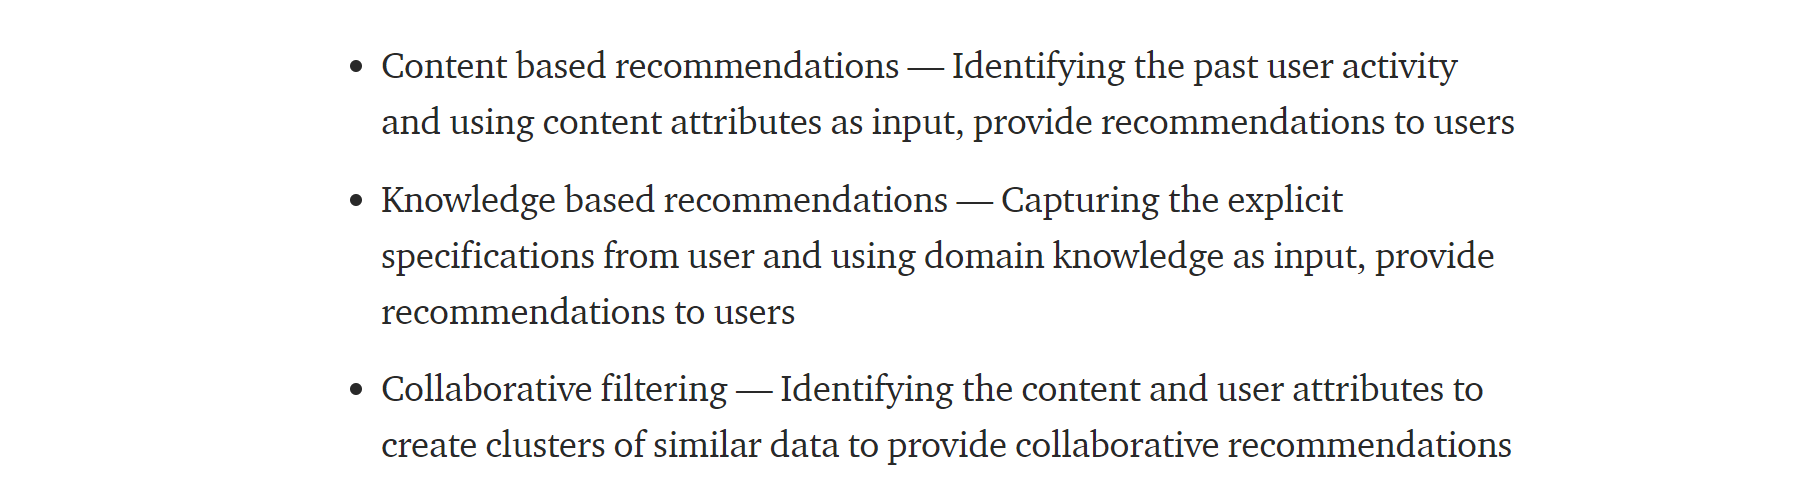

## 20 Newsgroups
#### A collection of ~18,000 newsgroup documents from 20 different newsgroups
(https://www.kaggle.com/crawford/20-newsgroups)



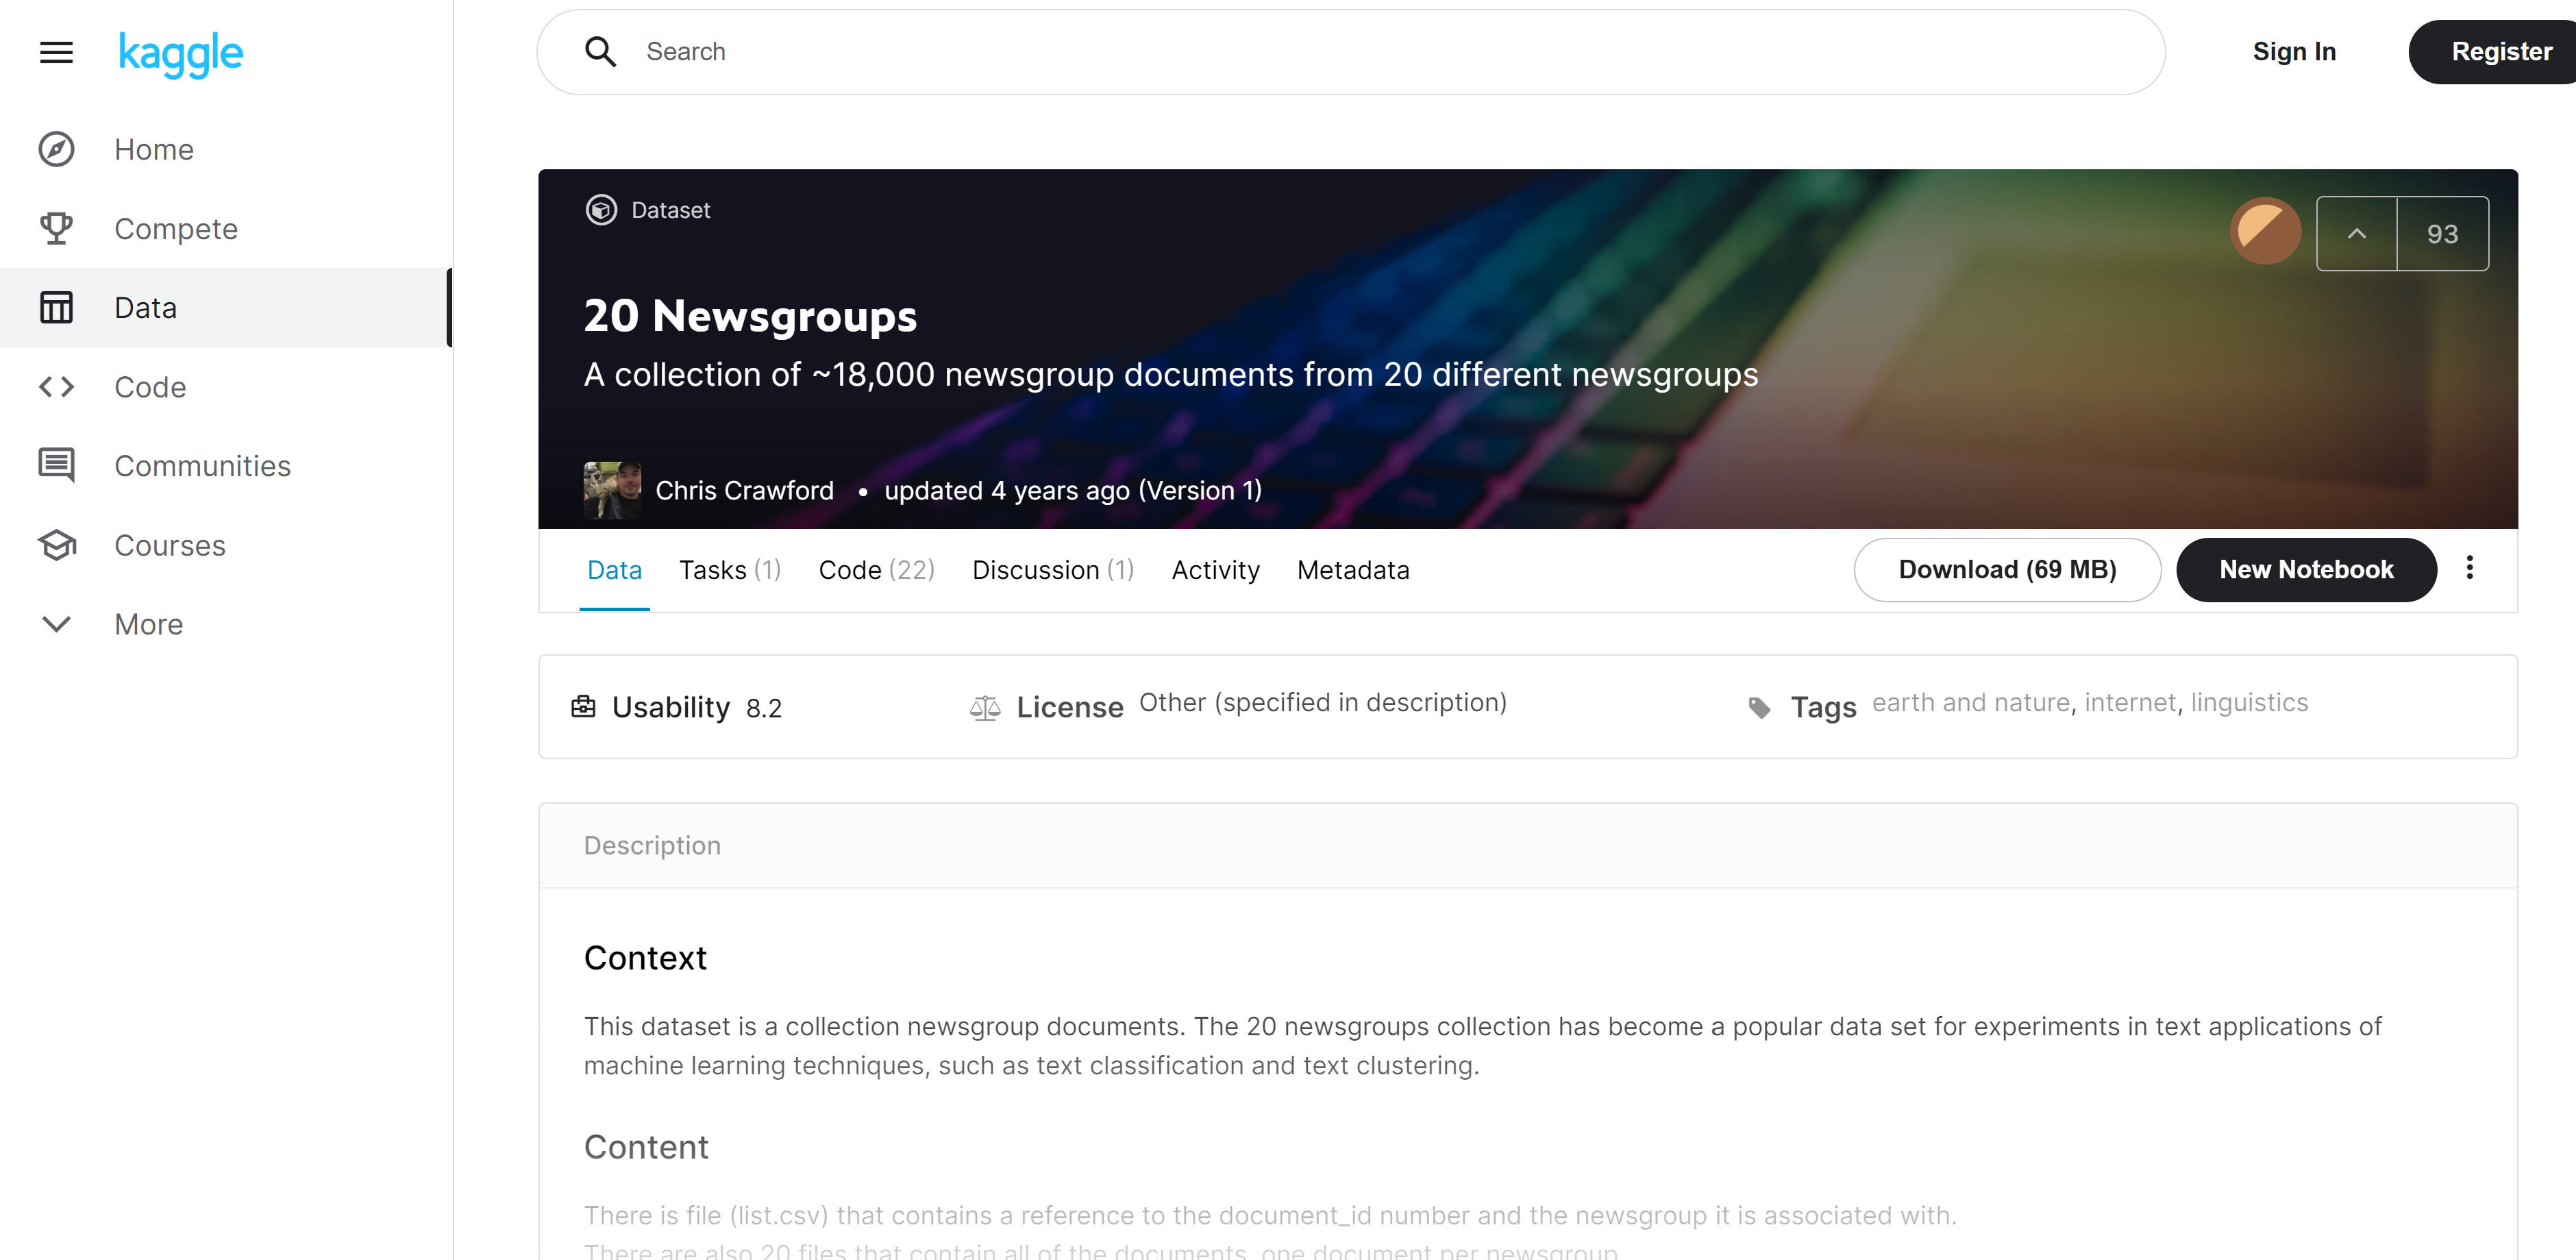

https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

## Topic Modelling

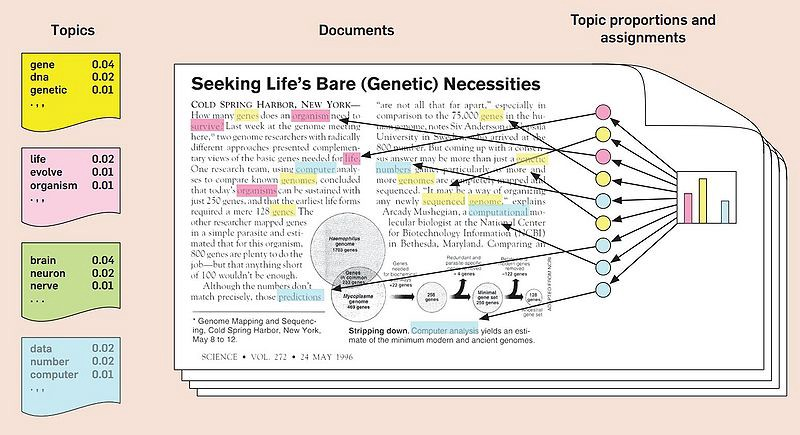

In natural language processing, the term topic means a set of words that “go together”. These are the words that come to mind when thinking of this topic. Take sports. Some such words are athlete, soccer, and stadium.

A topic model is one that automatically discovers topics occurring in a collection of documents.

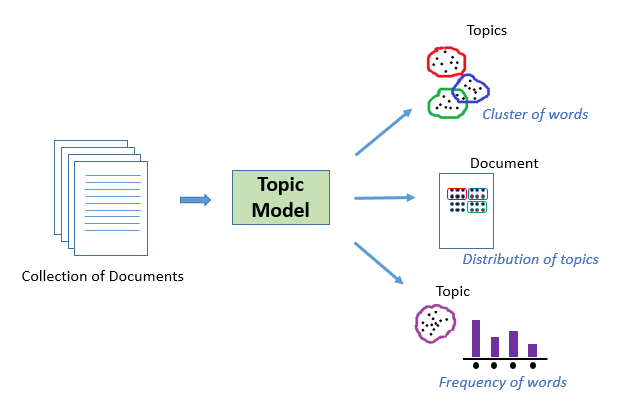

# Enough Talk! Let's Code Together

In [ ]:
!pip install ktrain==0.26.2

In [2]:
import os
import numpy as np
import pandas as pd
import ktrain
from sklearn.datasets import fetch_20newsgroups

In [5]:
remove = ('headers', 'footers', 'quotes')
train = fetch_20newsgroups(subset='train', remove=remove)
test = fetch_20newsgroups(subset='test', remove=remove)

texts = train.data + test.data

In [7]:
%%time
tm = ktrain.text.get_topic_model(texts, n_features=10000)

n_topics automatically set to 97
lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.
CPU times: user 2min 54s, sys: 2min 12s, total: 5min 6s
Wall time: 2min 40s


In [8]:
tm.build(texts, threshold=0.25)

done.


In [10]:
tm.train_recommender()

In [17]:
rawtext = """
 On Monday, May 17, at 1:10 p.m. EDT, NASA astronaut Megan McArthur will answer prerecorded video questions from students across the greater Houston area coordinated by the Ismaili Council for the Southwestern United States. Participating students are from the Aldine, Alief, Fort Bend, Houston, and Stafford school districts, as well as the private Awty International, Etoile Academy, The Honor Roll, and The Village Schools. Houston Mayor Sylvester Turner will offer prerecorded opening remarks. Media interested in covering it should contact Alim Adatia at: 832-605-5296 or aadatia@gmail.com.
 """

In [18]:
tm.recommend(text=rawtext, n=5)

[{'doc_id': 288,
  'text': 'Is there anyone out there running a Chicago National\n\tLeague Ballclub list?  If so, please send me information\n\ton it to...\n\t\t\tandrew@aardvark.ucs.uoknor.edu\n\n\tThanks!',
  'topic_id': 29,
  'topic_proba': 0.3317774094940724},
 {'doc_id': 598,
  'text': '\nRefer to patents by JAMES HARRIS ROGERS:\n958,829; 1,220,005; 1,322,622; 1,349,103; 1,315,862; 1,349,104;\n1,303,729; 1,303,730; 1,316,188\n\nHe details methods of underground and underwater wireless communications.\nFor a review, refer to _Electrical_Experimenter_, March 1919 and June 1919.\n\nRogers\' methods were used extensively during the World War, and was\nunclassified after the war. Supposedly, the government rethought this\nsoon after, and Rogers was convieniently forgotten.\n\nThe bottom line is that all antennas that are grounded send HALF of\ntheir signal THRU the ground. The half that travels thru space is\nquickly dissapated (by the square of the distance), but that which\ntravels t

In [19]:
for i, doc in enumerate(tm.recommend(text=rawtext, n=5)):
  print('Result #%s'% (i+1))
  print('Text \n')
  print(" ".join(doc['text'].split()[:500]))
  print()

Result #1
Text 

Is there anyone out there running a Chicago National League Ballclub list? If so, please send me information on it to... andrew@aardvark.ucs.uoknor.edu Thanks!

Result #2
Text 

Refer to patents by JAMES HARRIS ROGERS: 958,829; 1,220,005; 1,322,622; 1,349,103; 1,315,862; 1,349,104; 1,303,729; 1,303,730; 1,316,188 He details methods of underground and underwater wireless communications. For a review, refer to _Electrical_Experimenter_, March 1919 and June 1919. Rogers' methods were used extensively during the World War, and was unclassified after the war. Supposedly, the government rethought this soon after, and Rogers was convieniently forgotten. The bottom line is that all antennas that are grounded send HALF of their signal THRU the ground. The half that travels thru space is quickly dissapated (by the square of the distance), but that which travels thru the ground does not disapate at all. Furthermore, the published data showed that when noise drowned out regular re